<h1 style='background: black; border:1; color: white'><center>Covid-19 Vaccination Drive</center></h1>

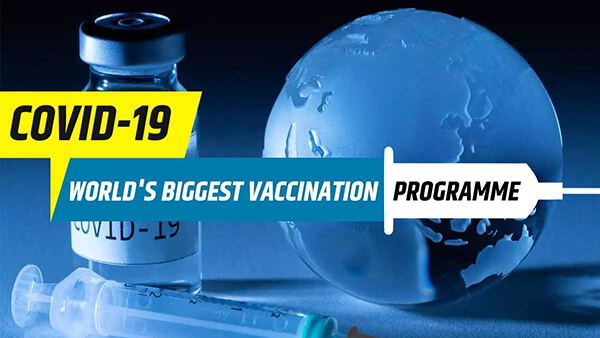

[(source)](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.indiatvnews.com%2Fnews%2Findia%2Fvaccination-drive-live-updates-pm-modi-covid19-breaking-news-january-16-678405&psig=AOvVaw1HplLsj31BBbZs88AmrQwa&ust=1612453659531000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCNDuwdKIzu4CFQAAAAAdAAAAABAD)

<h2 style='background: black; border:1; color: white'><center>Acknowledgement</center></h2>

This Notebook would not have been possible without the dataset provided by [@Gabriel Preda](https://www.kaggle.com/gpreda). If you haven't already, I strongly encourage you to upvote his dataset on [Covid-19 world vaccination progress](https://www.kaggle.com/gpreda/covid-world-vaccination-progress).



<h2 style='background: black; border:1; color: white'><center>Basic features of the data set</center></h2>

This is a basic exploratory data analysis of the Covid-19 vaccination drive that’s going around the world. Since past 11 months we have been sitting in our rooms and now we are getting some hopes in terms of COVID-19 vaccinations. 

* This data set starts on 2020-12-13, which means the vaccination according to it starts on this specific date and captures the data upto 2021-02-13.

* Till date the vaccination drive is going around the world in 78 different countries with more than 10 types of vaccines are being used. 

Hopefully this drive will bring success and save millions of lives around the world. 

I have done an exploratory data analysis with 3D/2D graphs and animations...

If you like this project then don't forget to **upvote**...


<h2 style='background: black; border:1; color: white'><center>Table of contents </center></h2>


* [Import](#chapter1)
* [Data Cleaning](#chapter2)
    * [Some features](#chapter3)
* [Data visualization](#chapter4)
    * [Word Art of countries](#chapter5)
* [Total vaccinated till date](#chapter6)
* [Country wise daily vaccination](#chapter7)
* [Plot till date Function](#chapter23)
    * [People vaccinated vs people fully vaccinated in the world](#chapter24)
    * [ People vaccinated vs people fully vaccinated per hundred in the world](#chapter25)
* [Function for Pie-Plot](#chapter20)
    * [Most used vaccine](#chapter8)
    * [Most frequent Sources](#chapter9)
    * [Word art of Vaccines](#chapter10)
* [Daily vaccination trend per million](#chapter11)
* [Total vaccinated - India vs USA](#chapter12)
* [Function for Maps](#chapter21)
    * [Most vaccinated country](#chapter13)
    * [Vaccines Used in Different countries](#chapter14)
    * [People fully vaccinated in Different countries](#chapter15)
* [Function for Animation](#chapter22)
    * [Animation of daily vaccinations through January 2021 in different countries](#chapter16)
    * [Animation of daily vaccinations per million through January 2021 in different countries](#chapter17)
* [Date vs People Vaccinated vs People Fully Vaccinated | 3D](#chapter18)
* [Corelation Heatmap](#chapter19)

# Import : <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [2]:
df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')

In [3]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568 entries, 0 to 4567
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4568 non-null   object 
 1   iso_code                             4260 non-null   object 
 2   date                                 4568 non-null   object 
 3   total_vaccinations                   2988 non-null   float64
 4   people_vaccinated                    2541 non-null   float64
 5   people_fully_vaccinated              1702 non-null   float64
 6   daily_vaccinations_raw               2523 non-null   float64
 7   daily_vaccinations                   4409 non-null   float64
 8   total_vaccinations_per_hundred       2988 non-null   float64
 9   people_vaccinated_per_hundred        2541 non-null   float64
 10  people_fully_vaccinated_per_hundred  1702 non-null   float64
 11  daily_vaccinations_per_million

In [5]:
df.isnull().sum()

country                                   0
iso_code                                308
date                                      0
total_vaccinations                     1580
people_vaccinated                      2027
people_fully_vaccinated                2866
daily_vaccinations_raw                 2045
daily_vaccinations                      159
total_vaccinations_per_hundred         1580
people_vaccinated_per_hundred          2027
people_fully_vaccinated_per_hundred    2866
daily_vaccinations_per_million          159
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

As you can see, a lot of null values are present in the data. The probable reasons would be:

1. The vaccination drive has just started. So, it hasn't quite taken pace all over the world.

2. The sources are not enough to cover the vaccination daily everywhere.

Whatever the reason might be, lets move ahead with cleaning the data and filling the missing values...

# Data cleaning : <a class="anchor" id="chapter2"></a>

In this section we have done particularly few things : 

1. Filled the null values with 0 and assumed that nothing has happened* regarding that particular column.
2. Converted all the numeric values* from object type to integer type.
3. Added 3 new columns viz **'year'**, **'month'** and **'date'**. (Asking why? You will get that later on...)
4. After adding them I turned them into integer type again and 
5. Converted the date column into datetime from object type.


In [6]:
df.fillna(value = 0, inplace = True)
df.total_vaccinations = df.total_vaccinations.astype(int)
df.people_vaccinated = df.people_vaccinated.astype(int)
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int)

df.daily_vaccinations_raw = df.daily_vaccinations_raw.astype(int)
df.daily_vaccinations = df.daily_vaccinations.astype(int)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.astype(int)

df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(int)

In [7]:
date = df.date.str.split('-', expand =True)
date 

,0,1,2
0,2021,01,10
1,2021,01,11
2,2021,01,12
3,2021,01,13
4,2021,01,14
...,...,...,...
4563,2021,02,24
4564,2021,02,25
4565,2021,02,26
4566,2021,02,27


In [8]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]

df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

In [9]:
df.date = pd.to_datetime(df.date)

df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Albania,ALB,2021-01-10,0,0,0,0,0,0,0,0,0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,2021,1,10
1,Albania,ALB,2021-01-11,0,0,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,2021,1,11
2,Albania,ALB,2021-01-12,128,128,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,2021,1,12
3,Albania,ALB,2021-01-13,188,188,0,60,63,0,0,0,22,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,2021,1,13
4,Albania,ALB,2021-01-14,266,266,0,78,66,0,0,0,23,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,2021,1,14


### DataFrame is ready to get visualized 

## Some features : <a class="anchor" id="chapter3"></a>

In [10]:
print('Data point starts from ',df.date.min(),'\n')
print('Data point ends at ',df.date.max(),'\n')
print('Total no of countries in the data set ',len(df.country.unique()),'\n')
print('Total no of unique vaccines in the data set ',len(df.vaccines.unique()),'\n')

Data point starts from  2020-12-08 00:00:00 

Data point ends at  2021-02-28 00:00:00 

Total no of countries in the data set  117 

Total no of unique vaccines in the data set  22 



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568 entries, 0 to 4567
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              4568 non-null   object        
 1   iso_code                             4568 non-null   object        
 2   date                                 4568 non-null   datetime64[ns]
 3   total_vaccinations                   4568 non-null   int64         
 4   people_vaccinated                    4568 non-null   int64         
 5   people_fully_vaccinated              4568 non-null   int64         
 6   daily_vaccinations_raw               4568 non-null   int64         
 7   daily_vaccinations                   4568 non-null   int64         
 8   total_vaccinations_per_hundred       4568 non-null   int64         
 9   people_vaccinated_per_hundred        4568 non-null   int64         
 10  people_fully

# Data Visualization : <a class="anchor" id="chapter4"></a>

In [12]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year,month,day
count,4.568000e+03,4.568000e+03,4.568000e+03,4.568000e+03,4.568000e+03,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000
mean,1.138244e+06,8.391915e+05,1.887296e+05,4.163373e+04,5.302986e+04,4.420753,3.007443,0.714755,2341.426226,2020.927977,2.298380,16.396016
std,4.836662e+06,3.604334e+06,1.227922e+06,1.636365e+05,1.714283e+05,11.242975,7.621690,3.514159,4449.228370,0.258554,2.745313,8.578475
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.001200e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.940000e+02,0.000000,0.000000,0.000000,262.000000,2021.000000,1.000000,9.000000
50%,2.776050e+04,8.216500e+03,0.000000e+00,5.250000e+02,5.144000e+03,0.000000,0.000000,0.000000,999.000000,2021.000000,2.000000,17.000000
75%,4.094480e+05,2.412348e+05,1.901900e+04,1.515300e+04,2.443450e+04,4.000000,2.000000,0.000000,2124.500000,2021.000000,2.000000,24.000000
max,7.523600e+07,4.977218e+07,2.477992e+07,2.429823e+06,1.916190e+06,109.000000,69.000000,39.000000,54264.000000,2021.000000,12.000000,31.000000


In [13]:
df.country.unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'England', 'Estonia', 'Faeroe Islands', 'Falkland Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guatemala', 'Guernsey', 'Guyana', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao', 'Malaysia', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Monaco', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', '

This is a very useful sweet little **function** to resize the **Seaborn** plots

In [14]:
def size(m,n):
    fig = plt.gcf();
    fig.set_size_inches(m,n);

## Word Art of countries : <a class="anchor" id="chapter5"></a>

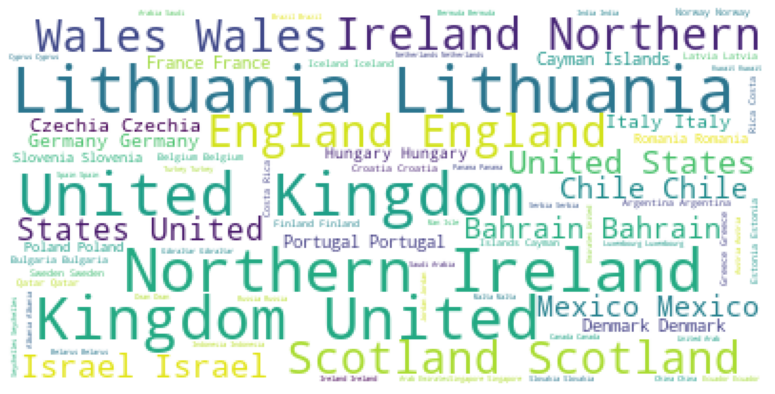

In [15]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.country))

plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

# Total vaccinated till date : <a class="anchor" id="chapter6"></a>

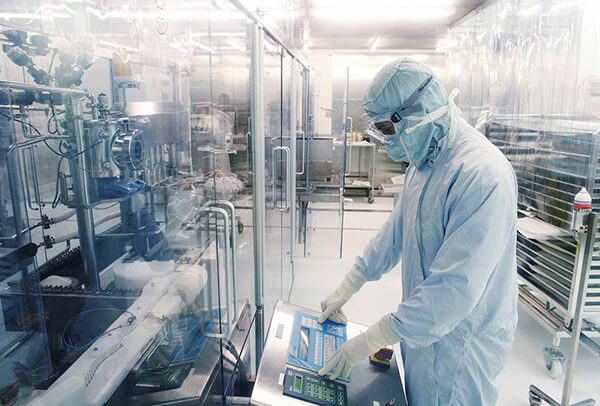

[(source)](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.sanofi.com%2Fen%2Fyour-health%2Fvaccines%2Fproduction&psig=AOvVaw1GVXrjgUDvF2eFYDuq5ogf&ust=1612453478659000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKDdnbuHzu4CFQAAAAAdAAAAABAD)

In [16]:
country_wise_total_vaccinated = {}

for country in df.country.unique() : 
    vaccinated = 0

    for i in range(len(df)) : 
        if df.country[i] == country : 
            vaccinated += df.daily_vaccinations[i]
    
    country_wise_total_vaccinated[country] = vaccinated 
#     made a seperate dict from the df 
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinted_till_date'])
#     converted dict to df 
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinted_till_date', ascending = False, inplace = True)

country_wise_total_vaccinated_df

,total_vaccinted_till_date
United States,68767620
China,34922496
United Kingdom,19660299
England,16602591
India,13483116
...,...
Trinidad and Tobago,441
Venezuela,155
Saint Helena,0
San Marino,0


In [17]:
fig = px.bar(country_wise_total_vaccinated_df, 
             y = 'total_vaccinted_till_date',
             x = country_wise_total_vaccinated_df.index,
             color = 'total_vaccinted_till_date',
             color_discrete_sequence= px.colors.sequential.Viridis_r
            )

fig.update_layout(
    title={
            'text' : "Vaccination till date in various countries",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total vaccinated",
    legend_title="Total vaccinated"
)

fig.show()

From the plot, some interesting facts are easily noticeable:

1. The **United States**, despite all protests, has the highest number of vaccines.
2. **China**, from where the virus started spreading, is at second.
3. **UK**, where we have found a new variant strain of the virus, is right next.
4. **India**, who has been supplying vaccines to the world is herself at 6th position.
5. Following that, we have **Turkey**, **UAE**, **Germany** and others.

# Country wise daily vaccination : <a class="anchor" id="chapter7"></a>

In [18]:
fig = px.line(df, x = 'date', y ='daily_vaccinations', color = 'country')

fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)

fig.show()

From this visualization we can see that :

1. **China** started **"Mass Vaccination"** first
2. Though **USA** started second, in terms of daily vaccinations it stands at the top now.
3. Following that we have **United Kingdom** and **England**
4. And then **India** comes in the 5th position in terms of daily vaccination




# Plot till date Function : <a class="anchor" id="chapter23"></a>

In [19]:
# helper function
def plot_till_date(value1, value2, title, color1, color2) : 
    
    so_far_dict = {}
    
    for dates in df.date.unique() : 
        so_far_dict[dates], value1_count, value2_count = [], 0, 0
    
        for i in range(len(df)) : 
        
            if df.date[i] == dates : 
                value1_count += df[value1][i]
                value2_count += df[value2][i]
#         if dates not in so_far_dict.keys() : 
        
        so_far_dict[dates].append(value1_count) 
        so_far_dict[dates].append(value2_count)
    
    so_far_df = pd.DataFrame.from_dict(so_far_dict, orient = 'index', columns=[value1, value2])
    so_far_df.reset_index(inplace = True)
#     return so_far_df
    
    so_far_df.sort_values(by='index', inplace = True)
    
    plot = go.Figure(data=[go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value1], 
            stackgroup='one', 
            name = value1, 
            marker_color= color1), 
                               
                           go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value2], 
            stackgroup='one',
            name = value2, 
            marker_color= color2) 
        ]) 
    
    plot.update_layout(
    title={
            'text' : title,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date"
    )
    
    return plot.show()

## People vaccinated vs people fully vaccinated in the world : <a class="anchor" id="chapter24"></a>

In [20]:
plot_till_date('people_fully_vaccinated', 'people_vaccinated','People vaccinated vs Fully vaccinated till date', '#c4eb28', '#35eb28')

## People vaccinated vs people fully vaccinated per hundred in the world : <a class="anchor" id="chapter25"></a>

In [21]:
plot_till_date('people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'People vaccinated vs Fully vaccinated per hundred till date', '#0938e3','#7127cc')

# Function for Pie-Plot : <a class="anchor" id="chapter20"></a>

In [22]:
def plot_pie(value, title, color) : 
    
    new_dict = {}
    
    for v in df[value].unique() : 
        value_count = 0
        
        for i in range(len(df)) : 
            if df[value][i] == v : 
                value_count += 1 
        
        new_dict[v] = value_count 
        
#     print(new_dict)


    new_df = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['Total'])
    
    if color == 'plasma' : 
        
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title,
                     color_discrete_sequence=px.colors.sequential.Plasma)
    
    elif color == 'rainbow' : 
        
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title,
                     color_discrete_sequence=px.colors.sequential.Rainbow)
    
    else :
        
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title)
    
    fig.update_layout(
        title={
            'y':0.95,
            'x':0.5
        },
        legend_title = value
    )
        
    return fig.show()

## Most used vaccine : <a class="anchor" id="chapter8"></a>


In [23]:
df.vaccines.unique()

array(['Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Moderna, Pfizer/BioNTech', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V', 'Johnson&Johnson',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'],
      dtype=object)

In [24]:
plot_pie('vaccines', 'Various vaccines and their uses', 'plasma')

From this Pie chart we can see that : 

1. The most used vaccine around the world is **Pfizer/BioNTech** which constitutes around **47.6%** of the totals vaccines used.
2. And the second most used vaccine is **Moderna** 
3. Then comes **Oxford/AstraZeneca, Sinovac** , **Pfizer/BioNTech, Sinopharm** and **Sputnik V**
4. **Indian** **Covaxin, Oxford/AstraZeneca** comes at 10th with **0.933%** market share.

# Most frequent Sources : <a class="anchor" id="chapter9"></a>


In [25]:
plot_pie('source_name', 'Sources', 'rainbow')

### Correction : 
Initially there were **36** sources. Now there is **40+** sources that's why the shares are getting devided.


## Word art of Vaccines<a class="anchor" id="chapter10"></a>

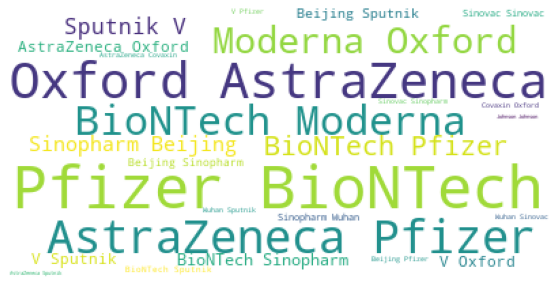

In [26]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.vaccines))

plt.figure(figsize=(12,5))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

# Daily vaccination trend per million : <a class="anchor" id="chapter11"></a>

In [27]:
fig = px.line(df, x = 'date', y ='daily_vaccinations_per_million', color = 'country')

fig.update_layout(
    title={
            'text' : "Daily vaccination trend per million",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations per million"
)

fig.show()

Currently **Israel** and **Seychelles** has the highest number of vaccinations per million 
* Though on **10th Jan** we can see a huge jump in **Gibraltar** which is highest among all 

# Total vaccinated - India vs USA : <a class="anchor" id="chapter12"></a>

In [28]:
india_usa = [df[df.country == 'United States'], df[df.country == 'India']]
result = pd.concat(india_usa)

fig = px.line(result, x = 'date', y ='total_vaccinations', color = 'country')

fig.update_layout(
    title={
            'text' : "Total vaccinated - India vs USA",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Total Vaccinations"
)

fig.show()

From the comparison between **India** and **USA** we can see that 

1. **USA** started the vaccination drive relative earlier.
2. Though **India** started late, the country is moving quite steadily.

# Function for Maps : <a class="anchor" id="chapter21"></a>

In [29]:
# helper function
def plot_map(variable, title, color) : 
    
    new_dict = {}
    
    for country in df.country.unique() : 
        
        for i in range(len(df)) : 
            if df.country[i] == country : 
                new_dict[country] = df[variable][i]
    
    new_dict
    
    new_df = pd.DataFrame.from_dict(new_dict, orient='index', columns =[variable])
    
    if color == None : 
        
        place_map = px.choropleth(new_df, locations =new_df.index,
                                  locationmode = 'country names',
                                  color=variable, 
                                  hover_name= new_df.index)
    
    else : 
        
        place_map = px.choropleth(new_df, locations =new_df.index,
                                  locationmode = 'country names',
                                  color=variable, 
                                  hover_name= new_df.index,
                                  color_continuous_scale= color)
        
    place_map.update_layout(
        title_text = title,
        title_x = 0.5,
        geo=dict(showocean=True, oceancolor="#7af8ff",
                showland=True, landcolor="white",
                showframe = False))
    
    
    return place_map.show()

## Most vaccinated country : <a class="anchor" id="chapter13"></a>

In [30]:
plot_map('total_vaccinations','Most vaccinated country', None)

## Vaccines Used in Different countries : <a class="anchor" id="chapter14"></a>

In [31]:
plot_map('vaccines','Vaccines Used in Different countries', None)

From this plot you can see the use of vaccines around the world : 

1. Though **India** sent it's vaccine to **Brazil**, it seems that Brazil has used the **Oxford** vaccine so far. Maybe in future we will get to see more use of **Covaxine** in Brazil.
2. In **North America** and **Europe**, **Pfizer** and **Moderna** are used widely.
3. In **Asia, Africa** and **South America**, **"Sputnik V"** is being used mostly. 

## People fully vaccinated in Different countries : <a class="anchor" id="chapter15"></a>

In [32]:
plot_map('people_fully_vaccinated','People fully vaccinated in Different countries', 'haline')

This is quite an eye opener to see that 

* Though the vaccination drive is going in full pace in most of the countries people are not fully vaccinated 

# Function for Animation: <a class="anchor" id="chapter22"></a>

In [33]:
def plot_animation(value, title, color) : 
    
    new_df = df[df.year == 2021]
    
    new_df.sort_values(by='day', inplace = True)
    
    if color == None : 
        
        place_map = px.choropleth(new_df, locations ="country",
                                    locationmode = "country names", 
                                    color=value,
                                    hover_name="country",
                                    animation_frame="day")
    
    else : 
        
        place_map = px.choropleth(new_df, locations ="country",
                                locationmode = "country names", 
                                color=value,
                                hover_name="country",
                                animation_frame="day",
                                color_continuous_scale= color)

    place_map.update_layout(
        title_text = title,
        title_x = 0.5,
        geo=dict(showocean=True, oceancolor="#7af8ff",
                showland=True, landcolor="white",
                showframe = False))
    
    return place_map.show()


## Animation of daily vaccinations through January 2021 in different countries: <a class="anchor" id="chapter16"></a>

In [34]:
plot_animation('daily_vaccinations', 'Animation of daily vaccinations through January 2021 in different countries', None)

## Animation of daily vaccinations per million through January 2021 in different countries: <a class="anchor" id="chapter17"></a>

In [35]:
plot_animation('daily_vaccinations_per_million', 'Animation of daily vaccinations per million through January 2021 in different countries', 'Plotly3')

# Date vs People Vaccinated vs People Fully Vaccinated | 3D: <a class="anchor" id="chapter18"></a>

In [36]:
fig = px.scatter_3d(df, x='date', y='people_vaccinated', z='people_fully_vaccinated',
                    color='country',
                    hover_data=['country'],
                    size = 'people_fully_vaccinated',
                    opacity=0.9, 
                    symbol = 'country')


fig.update_layout(title='Date vs People Vaccinated vs People Fully Vaccinated | 3D')

fig.update_layout(
        title={
            'y':0.95,
            'x':0.5
        }
    )

fig.show()

# Corelation Heatmap: <a class="anchor" id="chapter19"></a>

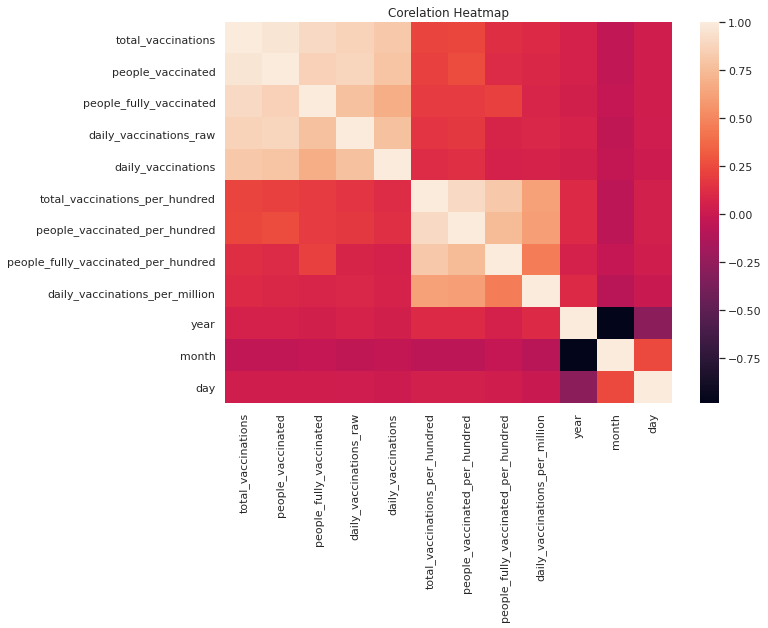

In [37]:
sns.heatmap(df.corr())
plt.title('Corelation Heatmap')
plt.yticks(rotation = 0);
size(10,7)

<h2 style='background: black; border:1; color: white'><center>Conclusion</center></h2>

Covid-19 has sent out education, economy and the whole world on the back foot. Millions of people lost their lives, families, friends and dear ones as well as their jobs. They are living under hard conditions.

In spite of everything, there has been certain positive impacts of this pandemic which might be regarded as the bright sides :

1. It has given an opportunity to work-from-home and spend time with our family, which is hardly possible nowadays due to our hectic schedule.
2. It has given a kick-start to online studies and make learning easier and global.
3. It has put forward the need to make technology accessible to all.
4. The stimulus to take immediate action in time of crisis has helped boost speed and innovations
5. As all the industries were in cold storage, this gave the nature an opportunity to flourish again and we got to see how **blue and beautiful** the skies could be.
6. And finally the Covid-19 vaccination has shown to the world that **United we stand, Divided we fall** 

### I hope together we can fight this out effectively and get back to our normal life again.

<h2 style='background: black; border:1; color: white'><center>Some Key observations</center></h2>

1. Though the vaccination drive is going in its full pace but in most of the countries people are not fully vaccinated 
2. In **North America** and **Europe Pfizer** and **Moderna** is widely used 
3. In **Asia, Africa** and **South America Sputnik V** is mostly used 
4. Though on **10th Jan** we can see a huge jump in **Gibraltar** which is highest among all 
5. The most used vaccine around the world is **Pfizer/ BioNTech**. Around **47.6%** of the total vaccines used 
6. **Indian** **Covaxin, Oxford/AstraZeneca** comes at 10th with **0.933%** market share.
7. **China** has started **"Mass Vaccination"** first 
8. Though **USA** started in the second position but in terms of daily vaccinations **USA** is at the top now 


### Thanks for sparing your time! Do **upvote** if you liked, This motivates hugely to come up with new explorations and keep updating…

<!-- #### Thanks for the support. Hit the upvote 🤗 -->

> It would be really nice if you check my other works and if you like my work then don't forget to **follow** for more interest notebooks  🤗